In [50]:
from matplotlib import pyplot as plt
%matplotlib inline
from astropy.io import ascii
import os
import scipy.stats
import numpy as np
from astropy import units as u
from astropy import constants as c
import sys

import warnings

warnings.filterwarnings('ignore')


In [2]:
homedir = os.getenv("HOME")
gitdir = homedir+'/github/Virgo/'

In [3]:
sys.path.append(homedir+'/github/Virgo/programs')
from virgoCommon import *

Running on Rose's computer


# Read in Kennicutt Halpha Filters #

Rob has a Halphalow and Halphahigh filters.  Got transmission curves from 

http://mogit.as.arizona.edu/90prime_files/Documents/filters/90Prime_filter_tracings/Halpha%20filters.txt

File has transmission for zero deg angle of incidence and 10 deg incidence.


Saved files in ~/github/Virgo/observing/

In [5]:
filepath = gitdir+'observing/'
halow_zero = filepath+'halphalow-zerodeg.txt'
halow_ten = filepath+'halphalow-tendeg.txt'
hahigh_zero = filepath+'halphahigh-zerodeg.txt'
hahigh_ten = filepath+'halphahigh-tendeg.txt'

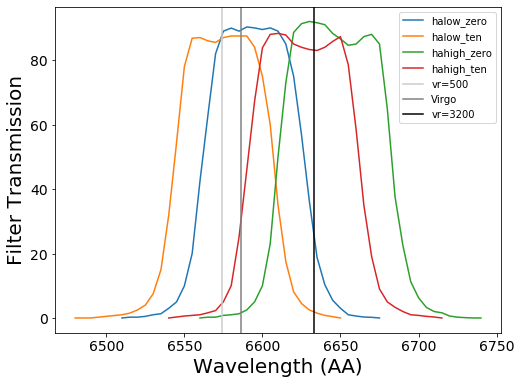

In [64]:
filters = [halow_zero,halow_ten,hahigh_zero,hahigh_ten]
filter_names = ['halow_zero','halow_ten','hahigh_zero','hahigh_ten']
plt.figure(figsize=(8,6))
for i in range(len(filters)):
    d = ascii.read(filters[i])
    plt.plot(d['col1'],d['col2'],label=filter_names[i])


# add virgo
# recession velocity ~ VC = 1050+/-35km s^-1^ from 
#  Binggeli, B.; Popescu, C. C.; Tammann, G. A.
# https://ui.adsabs.harvard.edu/abs/1993A%26AS...98..275B/abstract
# 
# assume a velocity disp of 1000 km/s

lambda_0 = 6563. # angstrom
vcenter = 1050#*u.km/u.s
width = 1000#*u.km/u.s
zcenter = vcenter/3.e5
lambda_obs_center = lambda_0*(1+zcenter)

vmin = vcenter - 0.5*width
zmin = vmin/3.e5
lambda_obs_min = lambda_0*(1+zmin)

vmax = vcenter + 0.5*width
zmax = vmax/3.e5
lambda_obs_max = lambda_0*(1+zmax)

mean = lambda_obs_center 
std = lambda_obs_max - lambda_obs_min


plt.axvline(x=lambda_0*(500./3.e5+1),label='vr=500',color='.8')
plt.axvline(x=lambda_obs_center,ls='-',color='0.5',label='Virgo')
plt.axvline(x=lambda_0*(3200./3.e5+1),label='vr=3200',color='k')
#plt.axvline(x=lambda_obs_min,ls='--',color='k')
#plt.axvline(x=lambda_obs_max,ls='--',color='k')

plt.legend()
plt.xlabel('Wavelength (AA)',fontsize=20)
plt.ylabel('Filter Transmission',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#x_min = 6500
#x_max = 6750
##plt.figure()
#x = np.linspace(x_min, x_max, 100)
#y = scipy.stats.norm.pdf(x,mean,std)
#plt.plot(x,4000*y,'k-',label='Virgo cluster')

plt.savefig('kennicutt_halpha.pdf')

# 2021 Observing Runs

* the info above is from 2020 - never observed

* we need to figure out filter and targets 

In [4]:
plotdir = '/home/rfinn/research/Virgo/plots/'
os.chdir(plotdir)

In [5]:
%run ~/github/Virgo/programs/readtables.py

number of CO with Halpha =  145
number of CO without Halpha =  97


Text(0.5, 1.0, 'Filamentary Structures Surrounding the Virgo Cluster')

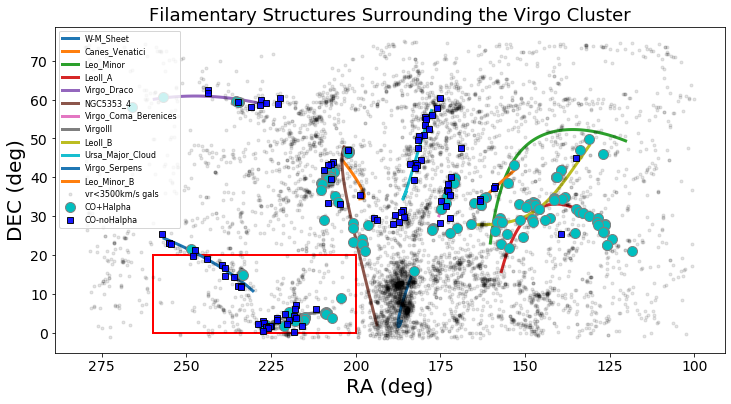

In [17]:
plt.figure(figsize=(12,6))
plot_spines()
plt.plot(v.main['RA'],v.main['DEC'],'k.',alpha=.1,label='vr<3500km/s gals')
# plot CO sources
flag = v.main['COflag'] & v.main['HAobsflag']
print('number of CO with Halpha = ',sum(flag))
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'co',markersize=10,alpha=1,label='CO+Halpha',mec='0.5')
flag = v.main['COflag'] & ~v.main['HAobsflag']
print('number of CO without Halpha = ',sum(flag))
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'bs',alpha=.9,mec='k',markersize=6,label='CO-noHalpha')


# add a rectangle for Blanco DD time, spring 2021
rect = Rectangle([200,0], 60, 20, fc="none",ec='r',lw=2,label='DECcam targets')
plt.gca().add_artist(rect)

# add a rectangle for Blanco DD time, spring 2021
#rect = Rectangle([178,-1], 20, 20, fc="none",ec='b',lw=2,label='Virgo Cluster')
#plt.gca().add_artist(rect)

#plt.axis([195,265,-2,30])
# continue with plot
plt.gca().invert_xaxis()
plt.xlabel('RA (deg)',fontsize=20)
plt.ylabel('DEC (deg)',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper left',fontsize=8)
plt.title('Filamentary Structures Surrounding the Virgo Cluster',fontsize=18)

# TODO for March 12-15 and April 13-17 90prime Runs

* email Dick Joyce, Melanie, Dara, Dennis about borrowing Halpha+4nm filter for 90prime
  - confirm that filter is available and exchange between kpno and steward is feasible
  
* airmass plots for general regions

* footprint of 90prime?
  - 1.16 x 1.16 deg 
  - 1.1 x 1.1 deg with mosaic filters (5.75 in, vs 6 in required for full FOV)

* finding charts for 97 remaining CO sources
  - github/Virgo/programs/kpno-halpha.p3.py
  
* Blanco+DECcam time at end of March 24-26

In [18]:
5.75/6*1.16

1.1116666666666666

# Finding Charts

In [39]:
os.chdir(homedir+'/research/Virgo/observing/')
%run ~/github/Virgo/programs/observing-halpha.py
print(len(pointing_ra))

/home/rfinn/github/Virgo/programs/observing-halpha.py:249: RuntimeWarning: divide by zero encountered in log10
  pointing_mag = 22.5 - 2.5 * np.log10(v.nsav0['NMGY'][:,4][obs_mass_flag])


nsa id not found in list of pointings
108


<Figure size 432x288 with 0 Axes>

In [31]:
os.mkdir('2021Mar')

In [36]:
pointing_id[0]

'VFID1728'

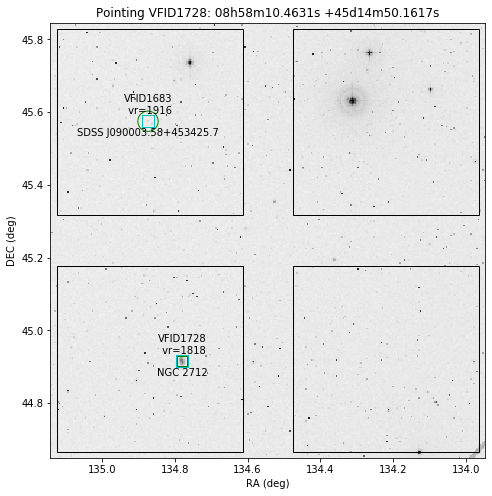

In [40]:
platinum_finding_chart(1,BOK=True)
#plot_BOK_footprint(pointing_ra[0],pointing_dec[0])

nsa id not found in list of pointings
gap_ra = 710.18 arcsec
gap_dec = 500.00 arcsec
detector_ra_width = 0.73
-0.8258608806965323 0.06944444444444445
-0.8258608806965323 -0.5814444444444444
0.09863589241785527 0.06944444444444445
0.09863589241785527 -0.5814444444444444
134.3769295 45.24726713333334 1.2 1.2
pointing  VFID0000  ngal =  2
gap_ra = 555.18 arcsec
gap_dec = 500.00 arcsec
detector_ra_width = 0.57
-0.6456172555817733 0.06944444444444445
-0.6456172555817733 -0.5814444444444444
0.07710883425064943 0.06944444444444445
0.07710883425064943 -0.5814444444444444
138.772066 25.76255593333333 1.2 1.2
pointing  VFID0001  ngal =  2
gap_ra = 634.55 arcsec
gap_dec = 500.00 arcsec
detector_ra_width = 0.65
-0.7379145994753219 0.06944444444444445
-0.7379145994753219 -0.5814444444444444
0.08813221102135048 0.06944444444444445
0.08813221102135048 -0.5814444444444444
158.344699 38.004936533333336 1.2 1.2
pointing  VFID0002  ngal =  1
gap_ra = 631.58 arcsec
gap_dec = 500.00 arcsec
detector_ra_widt

gap_ra = 705.44 arcsec
gap_dec = 500.00 arcsec
detector_ra_width = 0.72
-0.8203519466280231 0.06944444444444445
-0.8203519466280231 -0.5814444444444444
0.0979779453618457 0.06944444444444445
0.0979779453618457 -0.5814444444444444
180.290416 44.86454823333334 1.2 1.2
pointing  VFID0027  ngal =  3
gap_ra = 792.33 arcsec
gap_dec = 500.00 arcsec
detector_ra_width = 0.81
-0.9213922939423009 0.06944444444444445
-0.9213922939423009 -0.5814444444444444
0.11004544652994214 0.06944444444444445
0.11004544652994214 -0.5814444444444444
180.891307 50.87217243333333 1.2 1.2
pointing  VFID0028  ngal =  5
gap_ra = 744.53 arcsec
gap_dec = 500.00 arcsec
detector_ra_width = 0.76
-0.8658041904170679 0.06944444444444445
-0.8658041904170679 -0.5814444444444444
0.10340642673411779 0.06944444444444445
0.10340642673411779 -0.5814444444444444
181.0047595 47.81178713333333 1.2 1.2
pointing  VFID0029  ngal =  2
gap_ra = 776.51 arcsec
gap_dec = 500.00 arcsec
detector_ra_width = 0.80
-0.9029959897191316 0.0694444444

-0.757152234874455 0.06944444444444445
-0.757152234874455 -0.5814444444444444
0.09042982098448048 0.06944444444444445
0.09042982098448048 -0.5814444444444444
206.76897250000002 39.83095673333334 1.2 1.2
pointing  VFID0054  ngal =  11
gap_ra = 691.90 arcsec
gap_dec = 500.00 arcsec
detector_ra_width = 0.71
-0.8046017368422675 0.06944444444444445
-0.8046017368422675 -0.5814444444444444
0.0960968539557299 0.06944444444444445
0.0960968539557299 -0.5814444444444444
207.54077049999998 43.726235933333335 1.2 1.2
pointing  VFID0055  ngal =  7
gap_ra = 601.87 arcsec
gap_dec = 500.00 arcsec
detector_ra_width = 0.62
-0.6999040945372937 0.06944444444444445
-0.6999040945372937 -0.5814444444444444
0.08359249493618896 0.06944444444444445
0.08359249493618896 -0.5814444444444444
207.824161 33.82415773333334 1.2 1.2
pointing  VFID0056  ngal =  2
gap_ra = 674.72 arcsec
gap_dec = 500.00 arcsec
detector_ra_width = 0.69
-0.7846313043267165 0.06944444444444445
-0.7846313043267165 -0.5814444444444444
0.0937117

-0.5821910320896508 -0.5814444444444444
0.0695336121762536 0.06944444444444445
0.0695336121762536 -0.5814444444444444
226.44879550000002 2.9019532333333333 1.2 1.2
pointing  VFID0081  ngal =  5
gap_ra = 500.87 arcsec
gap_dec = 500.00 arcsec
detector_ra_width = 0.51
-0.5824613021660823 0.06944444444444445
-0.5824613021660823 -0.5814444444444444
0.0695658915340391 0.06944444444444445
0.0695658915340391 -0.5814444444444444
226.88989750000002 3.3860713333333337 1.2 1.2
pointing  VFID0082  ngal =  2
gap_ra = 500.05 arcsec
gap_dec = 500.00 arcsec
detector_ra_width = 0.51
-0.581501615130805 0.06944444444444445
-0.581501615130805 -0.5814444444444444
0.0694512725516524 0.06944444444444445
0.0694512725516524 -0.5814444444444444
226.95586 0.8034357333333333 1.2 1.2
pointing  VFID0083  ngal =  10
gap_ra = 1004.32 arcsec
gap_dec = 500.00 arcsec
detector_ra_width = 1.03
-1.1679251267838913 0.06944444444444445
-1.1679251267838913 -0.5814444444444444
0.13948923974295582 0.06944444444444445
0.139489239

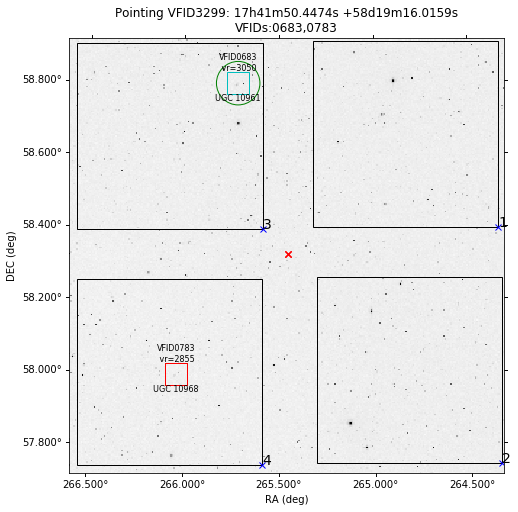

In [243]:
os.chdir(homedir+'/research/Virgo/observing/')
%run ~/github/Virgo/programs/observing-halpha.py
make_all_platinum(BOK=True)

# Adding shifts to maximize the number of galaxies in each pointing

* for 90prime, our main targets are going in the bottom two chips.

In [85]:
ra = v.main['RA']
dec = v.main['DEC']
cra,cdec,dra,ddec = 233.85566083333333, 59.70875456666667, 1.2, 1.2
ramin = cra-.5*dra
ramax = cra + 0.5*dra
decmin = cdec-.5*ddec
decmax = cdec + 0.5*ddec
flag = (ra > ramin) & (ra < ramax) & (dec > decmin) & (dec < decmax)
print(sum(flag))

5


In [91]:
v.main['RA'][v.main['VFID']=='VFID0603']

234.4723275


In [388]:
vfdict['VFID6165']

76

problem setting offset for VFID2797 - already observed, or in INT filter gap?
217.6187425 0.7940297999999999 1.2 1.2
pointing  VFID0057  ngal =  2


<Figure size 432x288 with 0 Axes>

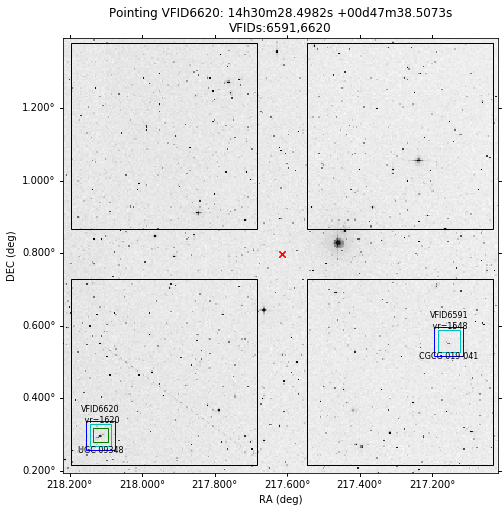

In [432]:
os.chdir('/home/rfinn/research/Virgo/finding-charts/2021Mar/')
%run ~/github/Virgo/programs/observing-halpha.py
platinum_finding_chart(vfdict['VFID6620'],BOK=True)
#rect = plt.Rectangle((233.85566083333333, 59.70875456666667),10,10,color='r')
#plt.gca().add_artist(rect)

In [376]:
pointing_id

VFID1728
VFID3299
VFID2303
VFID2562
VFID2593
VFID1538
VFID2098
VFID2947
VFID3272
VFID2484
VFID2259


In [241]:
convert_angle_2ra(1,59.2)

1.9530312602289264

# Airmass Plots for 2021-March Bok Run



nsa id not found in list of pointings
plotting airmass curves for Kitt Peak
14
plot 1 of 14
plot 2 of 14
plot 3 of 14
plot 4 of 14
plot 5 of 14
plot 6 of 14
plot 7 of 14
plot 8 of 14
plot 9 of 14
plot 10 of 14
plot 11 of 14
plot 12 of 14
plot 13 of 14
plot 14 of 14


<Figure size 432x288 with 0 Axes>

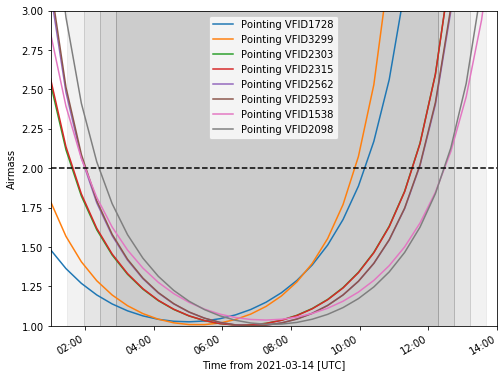

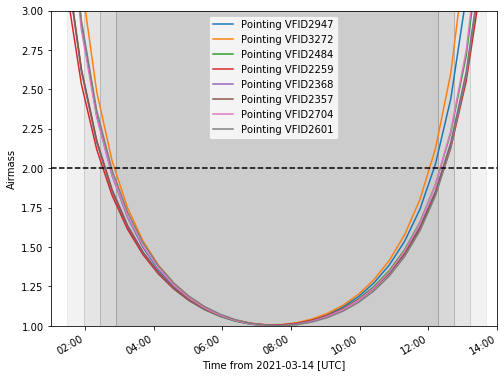

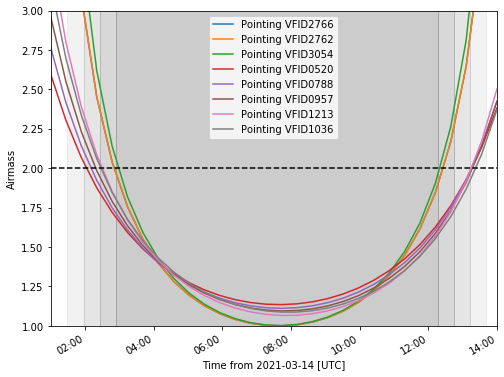

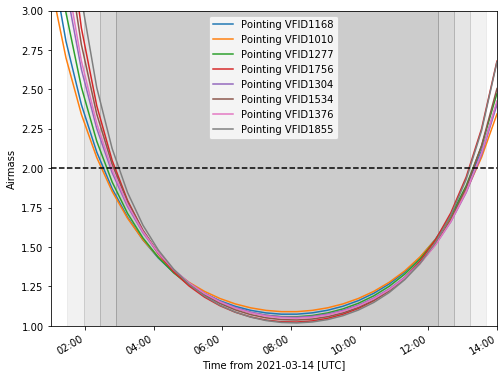

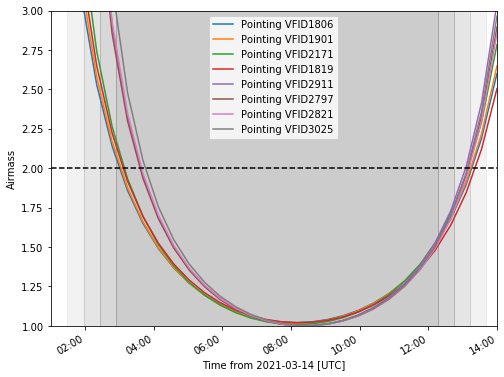

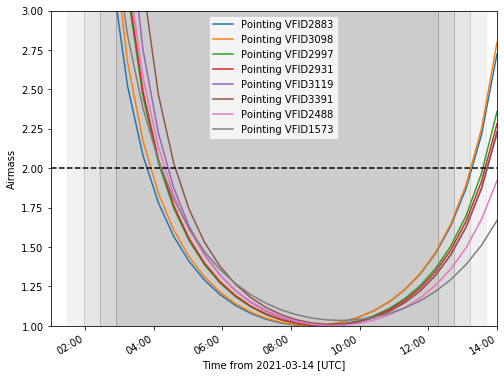

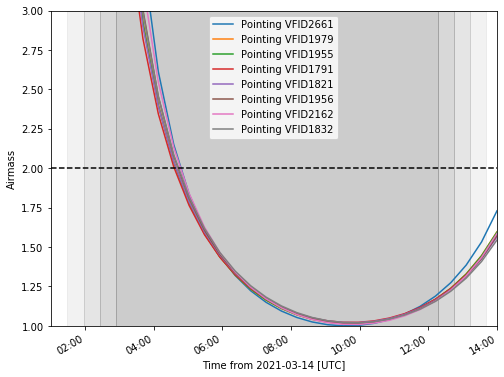

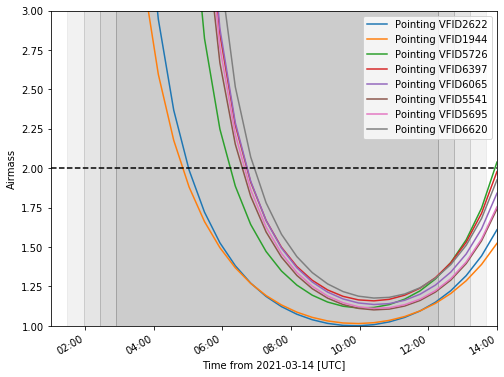

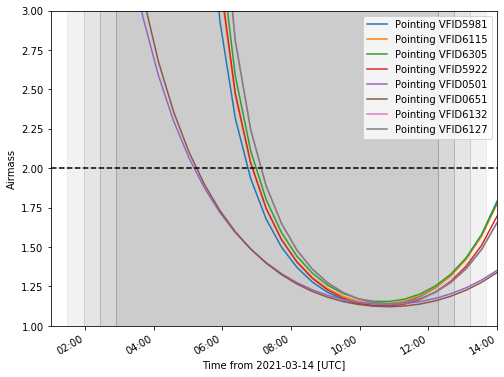

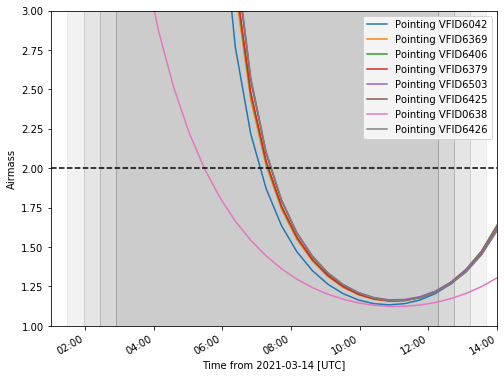

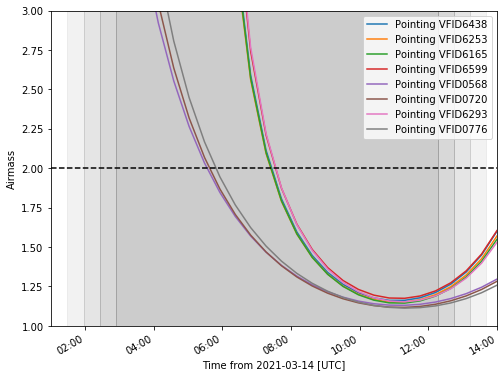

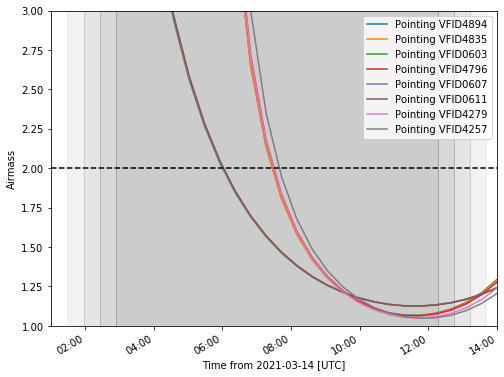

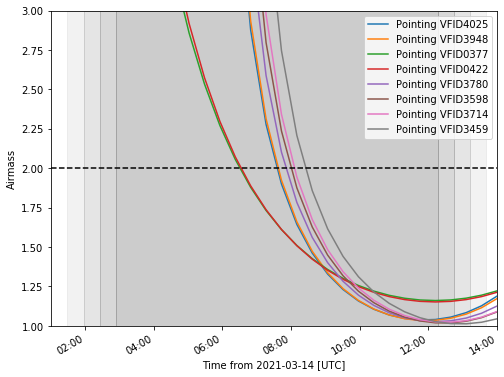

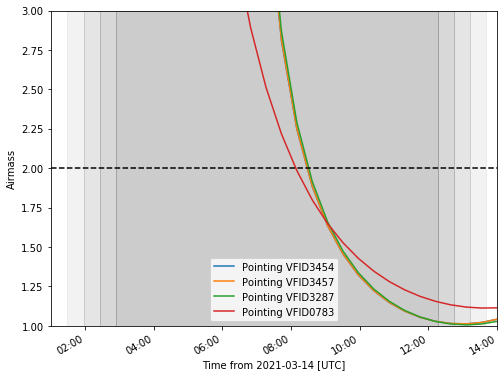

In [54]:
%run ~/github/Virgo/programs/observing-halpha.py
airmass_plotsv2(pointing_id,KPNO=True)

# Things to check

* (filter correction < 2. and CO) and Becky images (Virgo III)
* are r and Halpha expected to have the same focus?  If not, what is the typical offset between the two?
  * will need to focus in each filter and measure the offset
  
* finding charts 
* dither script for each object and filter
  * Greg is doing this
  * program is in github/Virgo/programs/
* airmass plots

* observing plan for each night

# Generating dither scripts

In [216]:
os.chdir('/home/rfinn/research/Virgo/finding-charts/2021Mar/')
%run ~/github/Virgo/programs/observing-halpha.py

nsa id not found in list of pointings


In [217]:
sys.path.append(homedir+'/github/Virgo/programs/')
from bok_dither_make import bok_dither_make

In [218]:
bok_dither_make(pointing_id[0],pointing_ra[0],pointing_dec[0])

085930.46 +445450.2
085932.82 +445515.2
085928.11 +445520.2
085927.64 +445425.2
085933.29 +445420.2
085930.46 +445450.2
085932.82 +445515.2
085928.11 +445520.2
085927.64 +445425.2
085933.29 +445420.2


In [215]:
for i,ra in enumerate(pointing_ra):
    bok
    pass

        RA        
------------------
       134.8769295
        139.272066
        158.844699
159.06770400000002
163.15982250000002
       163.2837705
168.77312016666667
       171.8414175
         172.00245
       172.0460145
               ...
       239.6347605
243.45883333333336
243.72837566666666
243.87017100000003
247.36293600000002
248.08795500000002
        254.536089
255.18787200000003
       255.2096895
       257.1064935
 265.9601976666667
Length = 106 rows
       DEC        
------------------
        44.9139338
        25.4292226
        37.6716032
        37.3246539
        34.4829984
        33.9103583
47.563764066666664
         40.013067
        29.5110084
        25.6610799
               ...
        17.4414742
        62.5366944
        61.7819444
        18.9047852
        21.3366323
         19.824008
        22.9850973
        23.0440007
        23.0110376
        25.5172991
        57.9877822
Length = 106 rows
  VFID  
--------
VFID1728
VFID3299
VFID2303
VFID231